In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import csv

In [4]:
dataframe = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', names = ['Wikipedia MovieID', 'Freebase MovieID', 'Movie name', 'Movie release date', 'Movie Boxoffice Revenue','Movie runtime', 'Movie Languages', 'Movie COuntries', 'Movie genres' ])

# Afficher le tableau
display(dataframe)

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [91]:
#Drop every movie with a NaN as a release date and create a new coluln Movie release date
dataframe2 = dataframe.copy()
dataframe2 = dataframe2.dropna(subset=['Movie release date'])
dataframe2['Movie release Year'] = dataframe2['Movie release date'].str[0:4]

display(dataframe2)


,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992


In [89]:

#Verification des années
dataframe3 = dataframe2.copy()
dataframe3 = dataframe3[dataframe3['Movie release Year'].str.len() == 4]
dataframe3['Movie release Year'] = dataframe3['Movie release Year'].apply(lambda x: int(x) if x.isdigit() else 10000) #Check si les strings sont autres que des nombres
dataframe3 = dataframe3.sort_values('Movie release Year', ascending=True) #Trier les films par ordre croissant des années

# Vérifier que toute la colonne est de type entier
print(all(isinstance(x, int) for x in dataframe3['Movie release Year']))
display(dataframe3)


True


,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888
38764,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1889
60249,22770416,/m/0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1890
53907,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1890
17849,27773121,/m/0cc8h1v,Newark Athlete,1891,NaN,0.20,{},{},"{""/m/02hmvc"": ""Short Film""}",1891
...,...,...,...,...,...,...,...,...,...,...
51429,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",2015
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},"{""/m/06n90"": ""Science Fiction""}",2015
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2016
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


In [92]:
dataframe2.drop(62836, inplace=True) #Erreur sur la première valeur avec une année de 1010

Text(0, 0.5, 'Percentage Missing [%]')

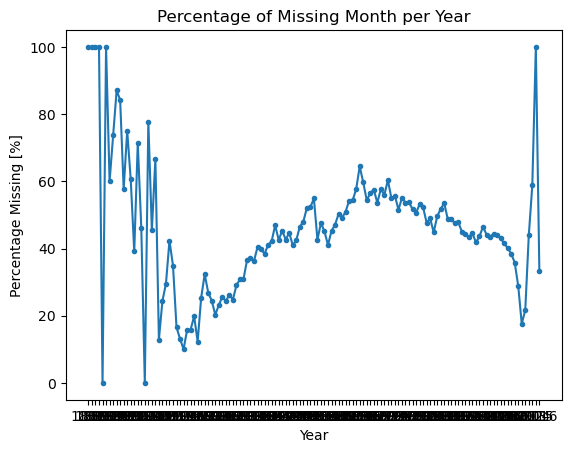

In [98]:
percentage = lambda x: (x.astype(str).apply(len) < 5).mean() * 100

missing_data_percentage = dataframe2.groupby('Movie release Year')['Movie release date'].apply(percentage)


# Use of the plot function to get a line plot
plt.plot(missing_data_percentage.index, missing_data_percentage.values, marker='.')
plt.title('Percentage of Missing Month per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing [%]')
#plt.grid(True)
#plt.show()

In [103]:
df = dataframe2[dataframe2['Movie release date'].str.len() > 4]
print(len(df))

42665


In [107]:
ratio = len(df)*100/len(dataframe)

print(f"Le ratio de film avec le mois de sortie est de : {ratio:.2f}%")

Le ratio de film avec le mois de sortie est de : 52.20%


In [125]:
#Création d'une colomne avec seulemen tle mois de release
df2 = df.copy()
df2['Movie release Month'] = df['Movie release date'].str[5:7]

In [121]:
#Transformer les mois qui sont des strings en int
df2['Movie release Month'] = df2['Movie release Month'].apply(lambda x: int(x) if str(x).isdigit() else 10000) #Check si les strings sont autres que des nombres

In [134]:
#Check if every month value makes sence
if all((int(x) <= 12 and int(x) >= 1) for x in df2['Movie release Month']):
    print("All values in df2 are less than or equal to 12 and greater than or equal to 1.")
else:
    print("At least one value in df2 is greater than 12 or less than 1.")


All values in df2 are less than or equal to 12 and greater than or equal to 1.


In [123]:
#Nombre de films par mois

def NumberOfMonths(data):
    global months

    if data == 1:
        months[0] += 1  # January
    elif data == 2:
        months[1] += 1  # February
    elif data == 3:
        months[2] += 1  # March
    elif data == 4:
        months[3] += 1  # April
    elif data == 5:
        months[4] += 1  # May
    elif data == 6:
        months[5] += 1  # June
    elif data == 7:
        months[6] += 1  # July
    elif data == 8:
        months[7] += 1  # August
    elif data == 9:
        months[8] += 1  # September
    elif data == 10:
        months[9] += 1  # October
    elif data == 11:
        months[10] += 1  # November
    elif data == 12:
        months[11] += 1  # December


# Initialisez la liste des mois à zéro
months = [0] * 12

df2['Movie release Month'].apply(NumberOfMonths)

total = sum(months)
print(total)

for i in range(len(months)) :
    print('Month', i + 1, ':', months[i])



42665
Month 1 : 3341
Month 2 : 3211
Month 3 : 3607
Month 4 : 3502
Month 5 : 3750
Month 6 : 3087
Month 7 : 2828
Month 8 : 3339
Month 9 : 4268
Month 10 : 4229
Month 11 : 3583
Month 12 : 3920


In [124]:
#Pourcentage de films par mois
for i in range(len(months)):
    print('Month', i + 1, ':', format(months[i]*100/total, '.2f'))

Month 1 : 7.83
Month 2 : 7.53
Month 3 : 8.45
Month 4 : 8.21
Month 5 : 8.79
Month 6 : 7.24
Month 7 : 6.63
Month 8 : 7.83
Month 9 : 10.00
Month 10 : 9.91
Month 11 : 8.40
Month 12 : 9.19
